In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from pathlib import Path

In [0]:
current_path = Path.cwd()

In [4]:
data_path = current_path / "data"

daitarn3_path = data_path / "daitarn3"
daitarn3_path.mkdir(exist_ok = True)

goldrake_path = data_path / "goldrake"
goldrake_path.mkdir(exist_ok = True)

jeeg_path = data_path / "jeeg"
jeeg_path.mkdir(exist_ok = True)

models_path = current_path / "models"

[content for content in data_path.iterdir()]

[PosixPath('/content/data/goldrake.txt'),
 PosixPath('/content/data/daitarn3.txt'),
 PosixPath('/content/data/goldrake'),
 PosixPath('/content/data/jeeg'),
 PosixPath('/content/data/cleaned.csv'),
 PosixPath('/content/data/jeeg.txt'),
 PosixPath('/content/data/daitarn3'),
 PosixPath('/content/data/models')]

In [0]:
from fastai.vision import *

In [6]:
download_images(data_path / "daitarn3.txt", daitarn3_path)
download_images(data_path / "goldrake.txt", goldrake_path)
download_images(data_path / "jeeg.txt", jeeg_path)

Error https://www.eknightmedia.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/b/a/bas55139_10.jpg HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/b/a/bas55139_10.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


In [7]:
for directory in data_path.iterdir():
  if directory.is_dir():
    verify_images(directory, delete = True, max_size = 500)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/data/jeeg/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='/content/data/jeeg/00000081.jpeg'>
cannot identify image file <_io.BufferedReader name='/content/data/jeeg/00000058.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/data/daitarn3/00000086.jpg'>


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:102: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [8]:
for directory in data_path.iterdir():
  if directory.is_dir():
    print(directory.name + ": " + str(len([file for file in directory.iterdir()])))

goldrake: 100
jeeg: 96
daitarn3: 96
models: 1


In [9]:
def set_random_seed(seed):
  # python RNG
  random.seed(seed)

  # pytorch RNGs
  import torch
  torch.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

  # numpy RNG
  import numpy as np
  np.random.seed(seed)

#set_random_seed(0)

data = ImageDataBunch.from_folder(data_path, train = '.', valid_pct = 0.2, size = 224)
print(data.classes)
print(data.c)
print(len(data.train_ds))
print(len(data.valid_ds))
data.show_batch()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
model = cnn_learner(data, models.resnet34, metrics = [error_rate, accuracy])

In [11]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.503473,1.069969,0.620690,0.379310,00:06
1,1.171306,0.819237,0.379310,0.620690,00:03
2,0.874820,0.703340,0.344828,0.655172,00:03
3,0.717063,0.679070,0.293103,0.706897,00:03


In [0]:
model.save(models_path / "model-01")

In [0]:
model.unfreeze()

In [14]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


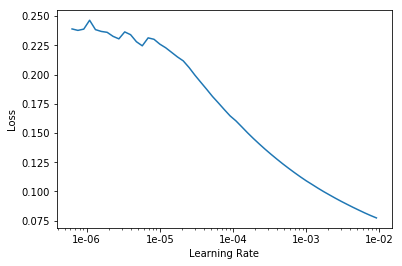

In [15]:
model.recorder.plot()

In [0]:
model.load(models_path / "model-01")

In [19]:
model.fit_one_cycle(10, max_lr = slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.259009,0.636884,0.241379,0.758621,00:03
1,0.171363,0.545624,0.206897,0.793103,00:04
2,0.124784,0.602863,0.224138,0.775862,00:04
3,0.095175,0.652770,0.172414,0.827586,00:04
4,0.074995,0.612289,0.172414,0.827586,00:04
5,0.061439,0.575433,0.189655,0.810345,00:04
6,0.051329,0.531798,0.155172,0.844828,00:04
7,0.043829,0.505100,0.155172,0.844828,00:04
8,0.037910,0.483990,0.155172,0.844828,00:04
9,0.033277,0.481933,0.155172,0.844828,00:04


In [0]:
model.save(models_path / "model-02")

In [0]:
interpretation = ClassificationInterpretation.from_learner(model)

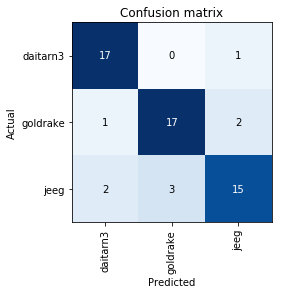

In [22]:
interpretation.plot_confusion_matrix()

In [0]:
interpretation.plot_top_losses(12)

In [0]:
interpretation.most_confused(min_val = 2)

In [0]:
from fastai.widgets import *

In [0]:
images = (ImageList.from_folder(data_path).split_none().label_from_folder().transform(get_transforms(), size = 224).databunch())

In [0]:
cleaner_model = cnn_learner(images, models.resnet34, metrics = [error_rate, accuracy])

In [0]:
cleaner_model.load(models_path / "model-02")

In [0]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [0]:
dataset, indices = DatasetFormatter().from_toplosses(cleaner_model)

In [0]:
#ImageCleaner(dataset, indices, data_path)

In [0]:
#dataset, indices = DatasetFormatter().from_similars(cleaner_model)

In [0]:
#ImageCleaner(dataset, indices, data_path)